### Score: 90

Q1.[4+9+10]

Q2.[9]

Q3.[4+4+5+4+5+5+5+4+4+3]

Q4.[5+5+5]

1. Significant earthquakes since 2150 B.C.

1.1读取数据并计算死亡总数最多的20个国家，最后再打印

In [3]:
import pandas as pd
file_name = r'C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv'

# 读取 TSV 文件
Sig_Eqs = pd.read_csv(file_name, sep='\t')

In [9]:
# 1.1
# 计算每个国家的死亡总数
# NOTE: 应该读取Total Deaths列的数据，而不是直接计算每个Location Name出现的次数 -1
deaths_by_country = Sig_Eqs['Location Name'].value_counts()

# 打印死亡总数最多的20个国家
print(deaths_by_country.head(20))

Location Name
CHINA:  YUNNAN PROVINCE            68
RUSSIA:  KURIL ISLANDS             53
TURKEY                             47
CHINA:  SICHUAN PROVINCE           46
BALKANS NW:  CROATIA               34
VANUATU ISLANDS                    34
SOLOMON ISLANDS                    34
PERU                               27
SWITZERLAND                        27
CHINA:  GANSU PROVINCE             27
MEXICO:  OAXACA                    26
TAIWAN                             25
ITALY:  N                          25
ITALY:  CENTRAL                    24
CHILE:  NORTHERN                   24
INDONESIA:  BANDA SEA              24
GREECE:  CRETE                     23
TURKEY:  ANTAKYA (ANTIOCH)         22
NEW CALEDONIA:  LOYALTY ISLANDS    22
JAPAN:  SANRIKU                    22
Name: count, dtype: int64


1.2导入`matplotlib.pyplot` ，再过滤震级大于3.0的地震，从原始的 `Sig_Eqs` DataFrame 中筛选出 `Mag`（震级）大于3.0的地震事件，存储在新的 DataFrame `Ms` 中。确保 'Year' 列是 datetime 类型，确保所有数据都能被正确处理。获取年份并计数，从 `Ms` DataFrame 的 `Year` 列中提取年份，并使用 `value_counts()` 方法统计每个年份的地震次数。`sort_index()` 方法确保结果按照年份排序。最后绘制时间序列图。

1      -2150.0
3      -2000.0
8      -1250.0
9      -1050.0
15      -479.0
         ...  
6439    2024.0
6440    2024.0
6441    2024.0
6442    2024.0
6443    2024.0
Name: Year, Length: 4663, dtype: float64
1      1969-12-31 23:59:59.999997850
3      1969-12-31 23:59:59.999998000
8      1969-12-31 23:59:59.999998750
9      1969-12-31 23:59:59.999998950
15     1969-12-31 23:59:59.999999521
                    ...             
6439   1970-01-01 00:00:00.000002024
6440   1970-01-01 00:00:00.000002024
6441   1970-01-01 00:00:00.000002024
6442   1970-01-01 00:00:00.000002024
6443   1970-01-01 00:00:00.000002024
Name: Year, Length: 4663, dtype: datetime64[ns]
Year
1969      20
1970    4643
Name: count, dtype: int64


C:\Users\zjm\AppData\Local\Temp\ipykernel_6880\980888100.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ms['Year'] = pd.to_datetime(Ms['Year'], errors='coerce')


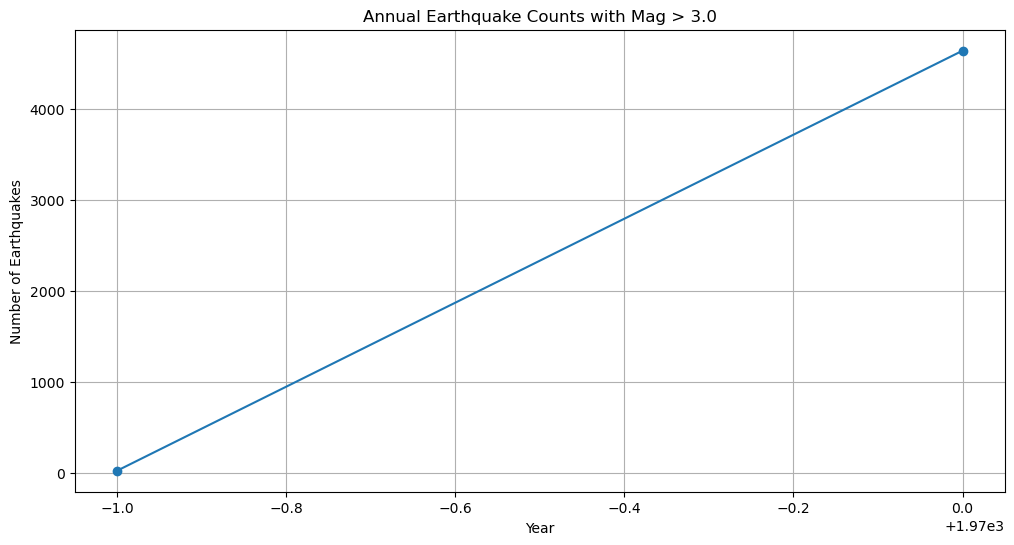

In [7]:
# 1.2
import matplotlib.pyplot as plt
# 过滤 Ms 列震级大于3.0的地震
# NOTE: 题目的意思是读取Ms列的数据作为震级，但考虑到最新的数据集似乎没有Ms列，因此使用Mag列也可以
Ms = Sig_Eqs[Sig_Eqs['Mag'] > 3.]
# 确保 'Year' 列是 datetime 类型
print(Ms['Year'])
# NOTE: 此处使用to_datetime解会将浮点数释为以纳秒为单位的时间戳，转换后时间与原表达不同 -1
Ms['Year'] = pd.to_datetime(Ms['Year'], errors='coerce')
print(Ms['Year'])
annual_eq_counts = Ms['Year'].dt.year.value_counts().sort_index()
print(annual_eq_counts)

# 绘制时间序列
plt.figure(figsize=(12, 6))
plt.plot(annual_eq_counts.index, annual_eq_counts.values, marker='o')
plt.title('Annual Earthquake Counts with Mag > 3.0')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()



原因分析：地震级数大于三级的地震总数增加可能与地球板块活动增强、地震活跃期的到来、地震活动增强现象、地震活动的空间尺度和时间尺度变化等因素有关。这些因素共同作用，可能导致我们观测到的大于三级的地震总数有所增加。

1.3定义函数 `CountEq_LargestEq`，筛选出该国家的所有地震数据，计算并返回该国家的地震总数。找出该国家最大的地震事件，并返回其日期和地点。应用函数并存储结果。将结果转换为 DataFrame。最后排序和打印结果，根据地震总数降序排列 `results_df`，打印排序后的 DataFrame，显示每个国家的地震总数、最大地震的日期和地点。

In [8]:
# 1.3
import pandas as pd


def CountEq_LargestEq(country):
    # 筛选特定国家的地震数据
    country_eqs = Sig_Eqs[Sig_Eqs['Location Name'] == country]
    
    # 计算地震总数
    total_eqs = len(country_eqs)
    
    # 寻找最大地震
    if total_eqs > 0:
        # 检查是否有任何非 NA 值
        if country_eqs['Mag'].notna().any():
            max_eq_index = country_eqs['Mag'].idxmax()
            max_eq = country_eqs.loc[max_eq_index]
            largest_eq_date = max_eq['Year']
            largest_eq_location = max_eq['Location Name']
        else:
            largest_eq_date = None
            largest_eq_location = None
    else:
        largest_eq_date = None
        largest_eq_location = None
    
    return total_eqs, largest_eq_date, largest_eq_location

# 应用函数并打印结果
countries = Sig_Eqs['Location Name'].unique()
results = {country: CountEq_LargestEq(country) for country in countries}

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results).T
results_df.columns = ['Total Earthquakes', 'Largest Earthquake Date', 'Largest Earthquake Location']

# 按照地震总数降序排列
results_df = results_df.sort_values(by='Total Earthquakes', ascending=False)

# 打印结果
print(results_df)

                                           Total Earthquakes  \
CHINA:  YUNNAN PROVINCE                                   68   
RUSSIA:  KURIL ISLANDS                                    53   
TURKEY                                                    47   
CHINA:  SICHUAN PROVINCE                                  46   
SOLOMON ISLANDS                                           34   
...                                                      ...   
INDONESIA:  SUMATERA:  BREUEH ISLAND                     1.0   
URUGUAY:  COLOGNE                                        1.0   
CHINA:  BOHAI GULF                                         1   
NEW ZEALAND:  SOUTH ISLAND: AMURI DISTRICT                 1   
NaN                                                      0.0   

                                           Largest Earthquake Date  \
CHINA:  YUNNAN PROVINCE                                     1833.0   
RUSSIA:  KURIL ISLANDS                                      1963.0   
TURKEY               

2. Air temperature in Shenzhen during the past 25 years
首先导入库和数据，再进行数据处理，转换为日期格式，重采样和计算平均值，最后绘制图表。

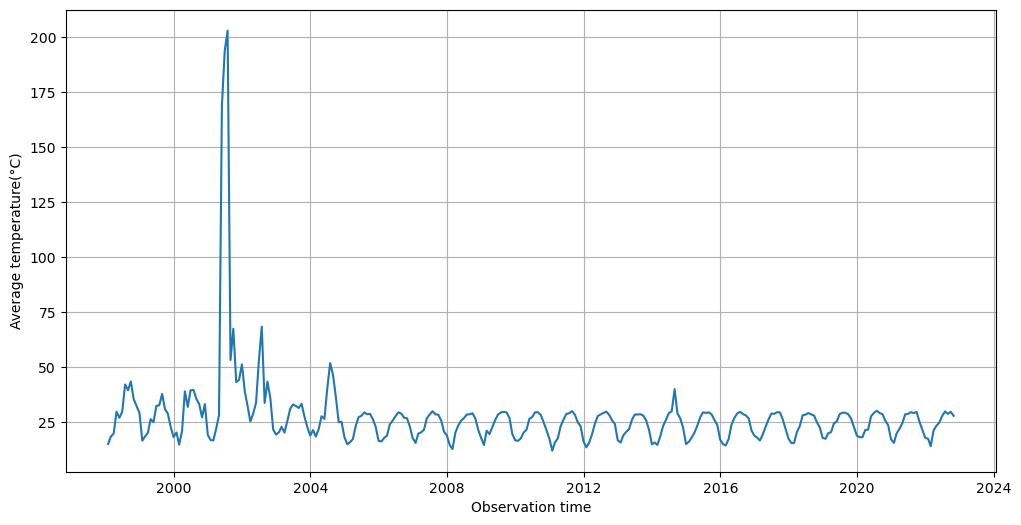

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv', low_memory=False)

# 数据清理
data['TMP'] = data['TMP'].replace('+9999', pd.NA)  # 替换缺失值
# NOTE: 没有根据质量指标筛选数据 -1
data['TMP'] = data['TMP'].str.split(',', expand=True)[0]  # 仅保留温度部分
data['TMP'] = pd.to_numeric(data['TMP'], errors='coerce')  # 转换为浮点数

# 将DATE列转为日期格式
data['DATE'] = pd.to_datetime(data['DATE'])

monthly_avg_temp = data.resample('ME', on='DATE')['TMP'].mean() / 10

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values)
plt.xlabel('Observation time')
plt.ylabel('Average temperature(°C)')
plt.grid()
plt.show()

趋势分析：图中曲线趋势显示了月平均气温随观测时间的变化，从2000年到2020年，气温变化呈现出周期性的波动，可能受到季节性因素的影响，同时整体上可能显示出长期的温度上升趋势，这可能与全球气候变暖的趋势相吻合。

3. Global collection of hurricanes

导入库，读取数据

In [16]:
import pandas as pd

# 读取CSV文件，设置low_memory=False以尝试更准确地推断数据类型
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                usecols=range(17),
                 # NOTE: 第二行是数据，不能跳过 -1
                skiprows=[1, 2], 
                parse_dates=['ISO_TIME'],
                na_values=['NOT_NAMED', 'NAME'],
                low_memory=False)

# 显示前几行数据以检查加载是否正确
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


筛选10个风速最大的

In [17]:
# 筛选出有风速和名称的数据
df_filtered = df[['NAME', 'WMO_WIND']].dropna()

# 将风速转换为数值类型，以便进行排序
df_filtered['WMO_WIND'] = pd.to_numeric(df_filtered['WMO_WIND'], errors='coerce')

# 按风速降序排序，并取前10个
top_10_hurricanes = df_filtered.sort_values(by='WMO_WIND', ascending=False).head(10)

# 打印结果
print(top_10_hurricanes)

            NAME  WMO_WIND
665954  PATRICIA     185.0
665952  PATRICIA     180.0
665956  PATRICIA     180.0
427636     ALLEN     165.0
482074   GILBERT     160.0
605746     WILMA     160.0
689332    DORIAN     160.0
689333    DORIAN     160.0
552459     LINDA     160.0
427634     ALLEN     155.0


先对df_filtered 的DataFrame进行处理，将风速列 WMO_WIND 转换为数值类型，然后按风速降序排序并选取前20个飓风，最后绘制一个水平条形图来展示这些飓风的名称和对应的风速，其中最大的飓风显示在图表的顶部。

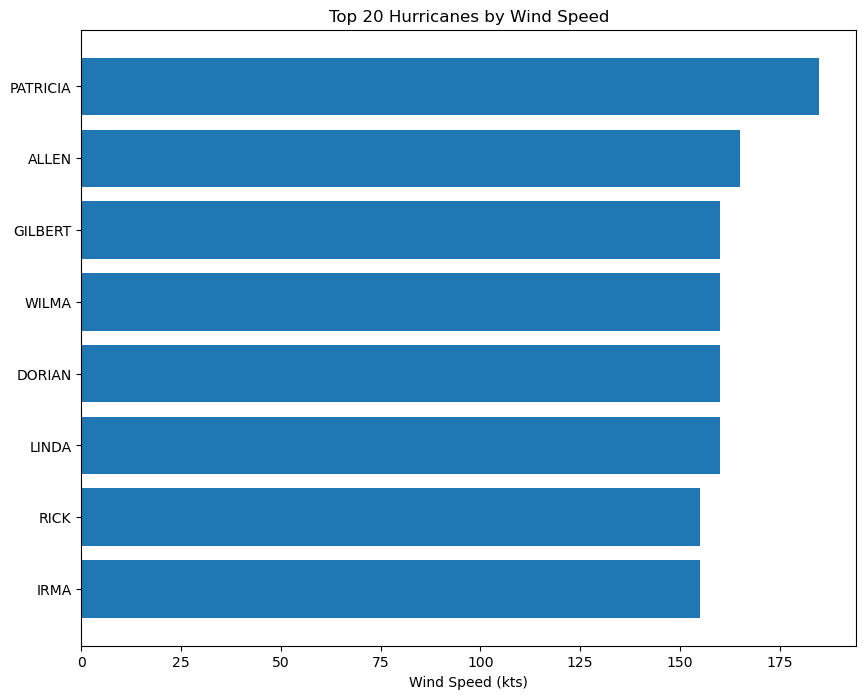

In [18]:
import matplotlib.pyplot as plt

# 继续使用df_filtered
df_filtered['WMO_WIND'] = pd.to_numeric(df_filtered['WMO_WIND'], errors='coerce')

# 按风速降序排序，并取前20个
top_20_hurricanes = df_filtered.sort_values(by='WMO_WIND', ascending=False).head(20)

# 绘制条形图
plt.figure(figsize=(10, 8))
# NOTE: 这里绘制时会自动合并NAME值相同的行，因此成图并没有20列 -1
plt.barh(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'])
plt.xlabel('Wind Speed (kts)')
plt.title('Top 20 Hurricanes by Wind Speed')
plt.gca().invert_yaxis()  # 反转y轴，使得最大的飓风在顶部
plt.show()

统计DataFrame df 中每个洗消槽的数据点数量，并通过绘制条形图来可视化这些统计结果，其中X轴表示洗消槽，Y轴表示对应的数据点数量，图表标题为“按洗消槽分类的数据点数量统计”。

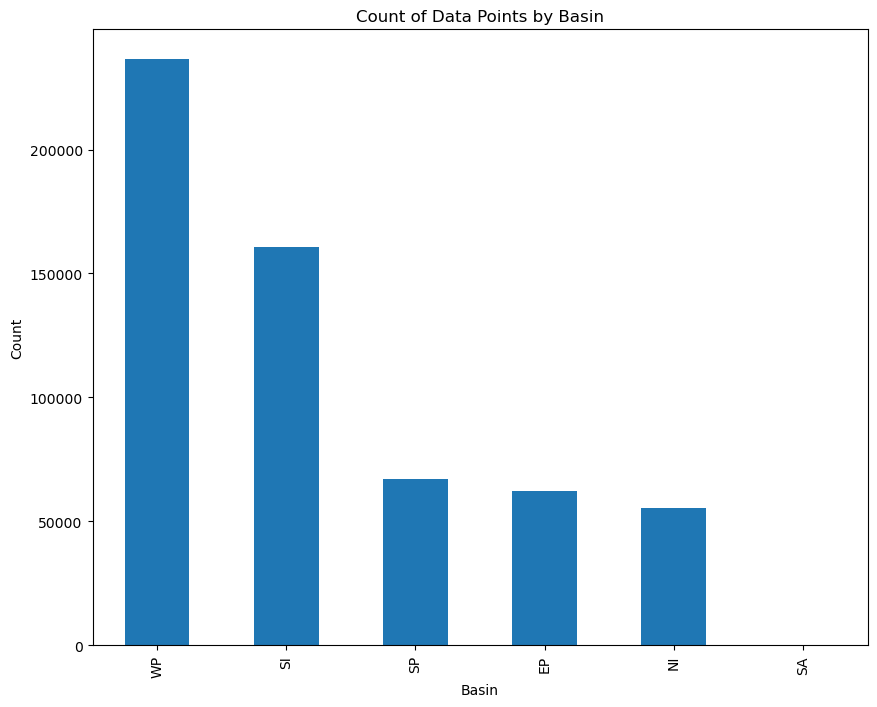

In [19]:
# 计算每个洗消槽的数据点数量
basin_counts = df['BASIN'].value_counts()

# 绘制条形图
plt.figure(figsize=(10, 8))
basin_counts.plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Count of Data Points by Basin')
plt.show()

先清理DataFrame df，移除缺少纬度（LAT）和经度（LON）数据的行，然后使用hexbin函数绘制一个六边形分箱图，以展示数据点在地理坐标系中的分布密度。图中的X轴表示经度，Y轴表示纬度，颜色深浅表示数据点的密度，同时包含一个颜色条以解释颜色与数据点数量的关系，图表标题为“按纬度和经度分箱的数据点分布图”。


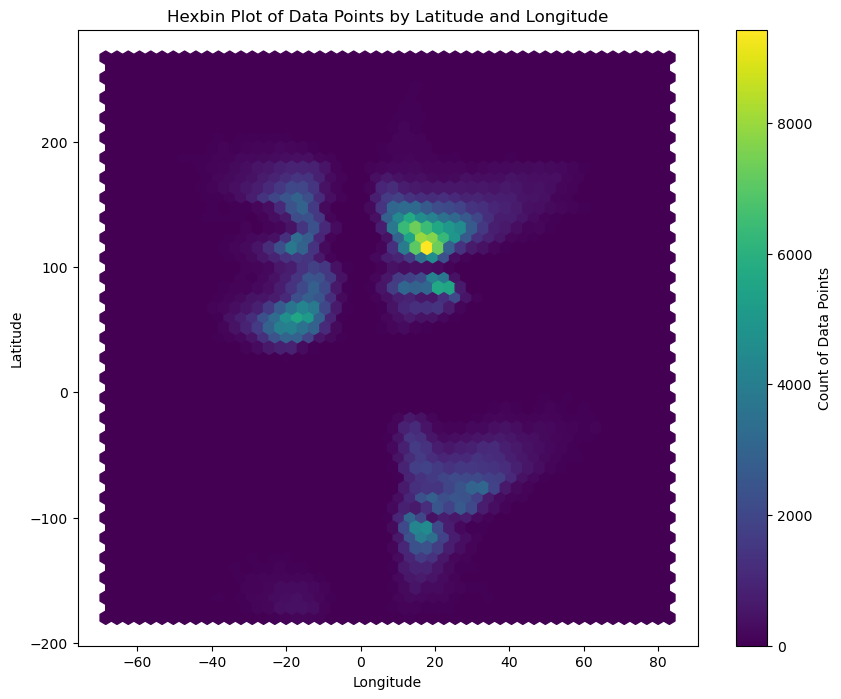

In [20]:
# 确保纬度和经度列存在且没有缺失值
df = df.dropna(subset=['LAT', 'LON'])

# 绘制hexbin图
plt.figure(figsize=(10, 8))
# NOTE: xy轴输入数据与后续的标签不符 -1
plt.hexbin(df['LAT'], df['LON'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points by Latitude and Longitude')
plt.show()

先筛选出2018年台风“山竹”（Mangkhut）的数据，并绘制其路径的散点图。图中以经度为x轴，纬度为y轴，散点的颜色表示不同时间点，使用颜色条来标记时间，图表标题为“2018年台风山竹的路径”。同时，图中添加了网格线以便于观察。

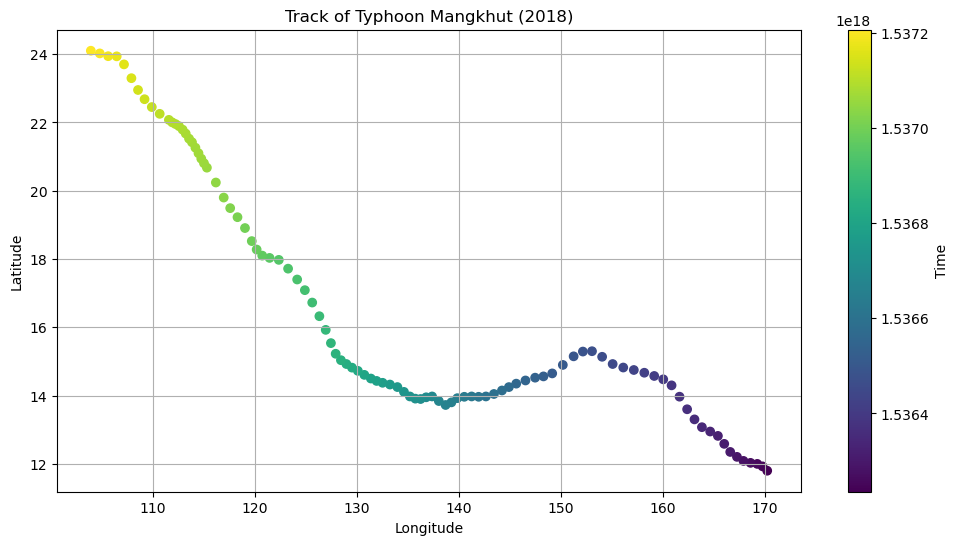

In [21]:


# 筛选出2018年的台风山竹（Mangkhut）的数据
mangosteen = df[(df['ISO_TIME'].dt.year == 2018) & (df['NAME'] == 'MANGKHUT')]
# 绘制散点图，以经度为x轴，纬度为y轴
plt.figure(figsize=(12, 6))
plt.scatter(mangosteen['LON'], mangosteen['LAT'], c=mangosteen['ISO_TIME'], cmap='viridis', marker='o')
plt.colorbar(label='Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.grid(True)
plt.show()

先读取数据，并进行了初步的数据筛选，保留了1970年以后在西太平洋（WP）和东太平洋（EP）盆地发生的台风记录，最后展示筛选后数据的前几行。

In [23]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                usecols=range(17),
                # NOTE: 问题同3.1，此处不重复扣分
                skiprows=[1, 2], 
                parse_dates=['ISO_TIME'],
                na_values=['NOT_NAMED', 'NAME'],
                low_memory=False)

# 过滤条件：1970年以后，且盆地为WP或EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
filtered_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________


检查并确保ISO_TIME列中的所有数据都是有效的日期时间格式，将非日期时间格式的字符串转换为NaT。然后，代码删除了所有包含NaT值的行，并提取了日期部分。最后，代码统计了每天的数据点数量，并绘制了一个条形图来展示每天的数据点计数，X轴为日期，Y轴为数据点数量，图表标题为“每日数据点计数”。

350393   1970-02-19 00:00:00
350394   1970-02-19 03:00:00
350395   1970-02-19 06:00:00
350396   1970-02-19 09:00:00
350397   1970-02-19 12:00:00
Name: ISO_TIME, dtype: datetime64[ns]
350393   1970-02-19 00:00:00
350394   1970-02-19 03:00:00
350395   1970-02-19 06:00:00
350396   1970-02-19 09:00:00
350397   1970-02-19 12:00:00
Name: ISO_TIME, dtype: datetime64[ns]


C:\Users\zjm\AppData\Local\Temp\ipykernel_6880\3961336326.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')


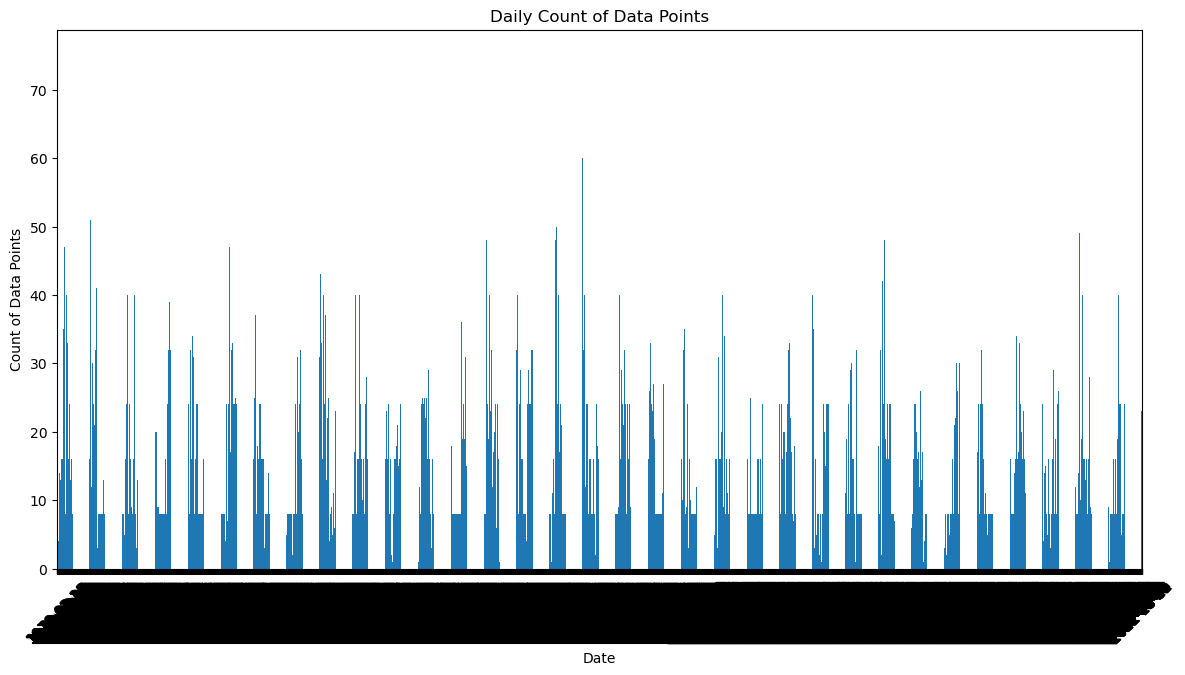

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                usecols=range(17),
                skiprows=[1, 2], 
                parse_dates=['ISO_TIME'],
                na_values=['NOT_NAMED', 'NAME'],
                low_memory=False)

# 过滤条件：1970年以后，且盆地为WP或EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
# 首先检查 'ISO_TIME' 列中是否有空值或非日期时间格式的字符串
print(filtered_df['ISO_TIME'].head())

# 尝试转换 'ISO_TIME' 列到 datetime 类型，指定 errors='coerce' 以处理错误
filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')

# 检查转换后的结果，看是否有 NaT 值
print(filtered_df['ISO_TIME'].head())

# 如果有 NaT 值，选择填充它们或从 DataFrame 中删除这些行
filtered_df = filtered_df.dropna(subset=['ISO_TIME'])

filtered_df['DATE'] = filtered_df['ISO_TIME'].dt.date

# 继续数据处理
daily_counts = filtered_df['DATE'].value_counts().sort_index()

# 绘制条形图
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count of Data Points')
plt.title('Daily Count of Data Points')
plt.xticks(rotation=45)  # 旋转 x 轴标签以提高可读性
plt.show()

首先在DataFrame filtered_df 中添加一个新的列 DAY_OF_YEAR，用于存储 ISO_TIME 列中每个日期对应的一年中的第几天。然后，它计算了一年中每一天的平均数据点数，方法是统计 DAY_OF_YEAR 列中每个唯一值的出现次数，并将这些计数除以总的唯一值数量，从而得到每天的平均数据点数。最后，它展示这个气候学数据的前10行。

In [26]:
# 计算一年中的第几天
filtered_df.loc[:, 'DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear
# 计算气候学：一年中每一天的平均数据点数
# NOTE: 气候态应该为出现的总数除以年数，而不是除以闰年的天数 -1
climatology = filtered_df['DAY_OF_YEAR'].value_counts().sort_index() / len(filtered_df['DAY_OF_YEAR'].value_counts())
climatology.head(10)

DAY_OF_YEAR
1     0.226776
2     0.196721
3     0.202186
4     0.254098
5     0.286885
6     0.330601
7     0.308743
8     0.396175
9     0.377049
10    0.374317
Name: count, dtype: float64

首先计算 filtered_df 中每个日期对应的一年中的第几天，并将结果存储在新列 DAY_OF_YEAR 中。然后，它通过将每个 DAY_OF_YEAR 对应的日期计数与之前计算的气候学平均值 climatology 进行比较，来计算日计数距平。距平是通过从每个日期的计数中减去相应的气候学平均值来得到的。最后，它展示这些距平值的前10行。

In [27]:
# 计算日计数距平
filtered_df.loc[:, 'DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear
# NOTE: 这样是计算了所有年份以DAY_OF_YEAR分组后，每组中DATE列非空值的总数 -1
anomalies = filtered_df.groupby('DAY_OF_YEAR')['DATE'].count() - climatology
anomalies.head(10)

DAY_OF_YEAR
1      82.773224
2      71.803279
3      73.797814
4      92.745902
5     104.713115
6     120.669399
7     112.691257
8     144.603825
9     137.622951
10    136.625683
dtype: float64

首先创建了一个包含日期和随机飓风活动数据的示例DataFrame，然后使用Pandas的resample函数将数据重新采样为年分辨率，并绘制了年飓风活动图。接着，它计算了年活动的平均值和标准差，定义了活动值超过平均值2个标准差的年份为异常年份，并打印出这些异常年份。这个过程可以帮助识别飓风活动异常的年份。

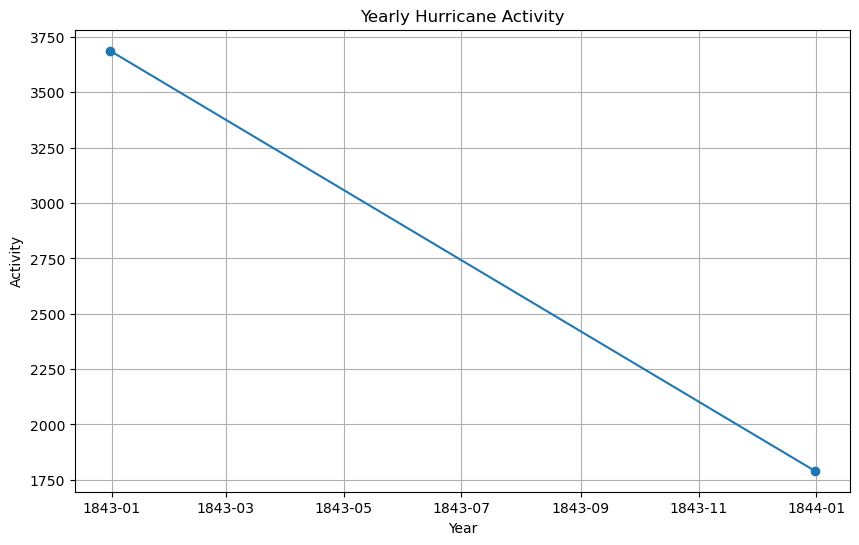

Anomalous hurricane activity years: []


In [40]:
import pandas as pd
import numpy as np  # 导入 NumPy 库
import matplotlib.pyplot as plt
# NOTE: 本题意为对3.9的数据重采样到年分辨率 -2
# 这里我们使用一个示例DataFrame来模拟
data = {
    'date': pd.date_range(start='1842-10-25', periods=100, freq='D'),
    'activity': np.random.randint(0, 100, size=100)  # 随机生成一些活动数据
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# 重新采样到年分辨率
yearly_activity = df.resample('YE').sum()

# 绘制重新采样后的数据
plt.figure(figsize=(10, 6))
plt.plot(yearly_activity.index, yearly_activity['activity'], marker='o')
plt.title('Yearly Hurricane Activity')
plt.xlabel('Year')
plt.ylabel('Activity')
plt.grid(True)
plt.show()

# 识别异常年份，这里简单地定义异常为活动值超过平均值的2个标准差
mean_activity = yearly_activity['activity'].mean()
std_activity = yearly_activity['activity'].std()
threshold = mean_activity + 2 * std_activity

# 找出超过阈值的年份
anomalous_years = yearly_activity[yearly_activity['activity'] > threshold].index.year

print(f"Anomalous hurricane activity years: {anomalous_years.tolist()}")

4. Explore a data set

读取数据，并清理缺失值

In [28]:
import pandas as pd

In [29]:
# 加载数据集
df = pd.read_csv('Marine_CSV_sample .csv')

# 显示数据集的前几行
print(df.head())

# 清除缺失值
df = df.dropna()

  Identification  Latitude  Longitude  Time of Observation  \
0          D5GN6     -35.8        2.9  2015-01-12T00:00:00   
1          D5GN6     -35.9        6.9  2015-01-12T12:00:00   
2          D5GN6     -35.9        8.6  2015-01-12T18:00:00   
3          D5GN6     -35.7       11.9  2015-01-13T06:00:00   
4          D5GN6     -35.6       13.7  2015-01-13T12:00:00   

  Ice Accretion On Ship Thickness of Ice Accretion On Ship  \
0                                                            
1                                                            
2                                                            
3                                                            
4                                                            

  Rate of Ice Accretion on Ship Sea Level Pressure  \
0                                            29.83   
1                                            29.93   
2                                            30.02   
3                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Identification                        55 non-null     object 
 1   Latitude                              55 non-null     float64
 2   Longitude                             55 non-null     float64
 3   Time of Observation                   55 non-null     object 
 4   Ice Accretion On Ship                 55 non-null     object 
 5   Thickness of Ice Accretion On Ship    55 non-null     object 
 6   Rate of Ice Accretion on Ship         55 non-null     object 
 7   Sea Level Pressure                    55 non-null     object 
 8   Characteristics of Pressure Tendency  55 non-null     object 
 9   Pressure Tendency                     55 non-null     object 
 10  Air Temperature                       55 non-null     object 
 11  Wet Bulb Temperature 

C:\Users\zjm\AppData\Local\Temp\ipykernel_6880\3944193573.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time of Observation'] = pd.to_datetime(df_cleaned['Time of Observation'])


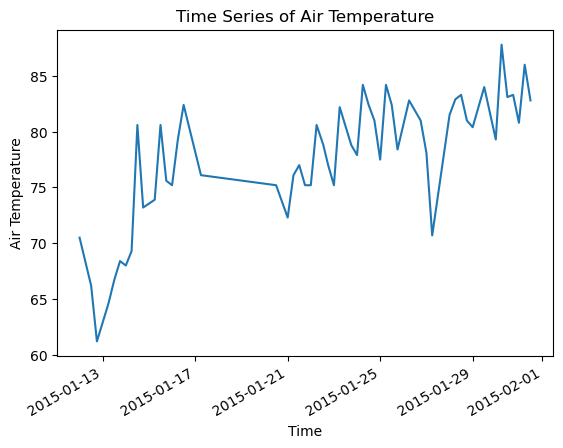

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# 加载CSV文件
df = pd.read_csv('Marine_CSV_sample .csv', low_memory=False)
# 查看数据信息，识别缺失值和数据类型
print(df.info())

# 检查'Air Temperature'列的数据类型
print(df['Air Temperature'].dtype)

# 如果'Air Temperature'列不是数值类型，尝试将其转换为数值类型
# 这将把非数值的条目转换为NaN（缺失值）
df['Air Temperature'] = pd.to_numeric(df['Air Temperature'], errors='coerce')

# 再次检查数据类型，确保转换成功
print(df['Air Temperature'].dtype)

# 清除包含缺失值的行
df_cleaned = df.dropna(subset=['Air Temperature'])

# 确保时间列是日期类型
df_cleaned['Time of Observation'] = pd.to_datetime(df_cleaned['Time of Observation'])

# 设置时间为索引
df_cleaned.set_index('Time of Observation', inplace=True)

# 绘制时间序列图
df_cleaned['Air Temperature'].plot()
plt.title('Time Series of Air Temperature')
plt.xlabel('Time')
plt.ylabel('Air Temperature')
plt.show()

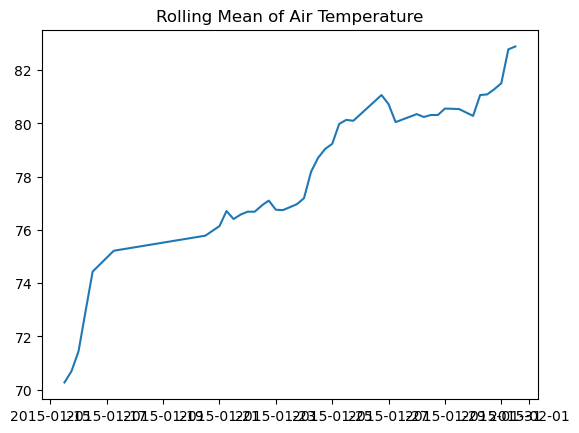

In [32]:
import matplotlib.pyplot as plt

# 时间趋势分析
rolling_mean = df_cleaned['Air Temperature'].rolling(window=12).mean()  # 12个月的滚动平均
plt.plot(rolling_mean)
plt.title('Rolling Mean of Air Temperature')
plt.show()

In [33]:
# 描述性统计
humidity_stats = df[['Air Temperature', 'Dew Point Temperature', 'Wet Bulb Temperature']].describe()

# 显示描述性统计结果
display(humidity_stats)

,Air Temperature
count,54.000000
mean,77.633333
std,5.835028
min,61.200000
25%,75.200000
50%,78.800000
75%,82.350000
max,87.800000


In [34]:
# 数据类型检查
data_types = df[['Air Temperature', 'Dew Point Temperature', 'Wet Bulb Temperature']].dtypes

# 显示数据类型结果
display(data_types)

Air Temperature          float64
Dew Point Temperature     object
Wet Bulb Temperature      object
dtype: object

In [35]:
# 缺失值检查
missing_values = df[['Air Temperature', 'Dew Point Temperature', 'Wet Bulb Temperature']].isnull().sum()

# 显示缺失值结果
display(missing_values)

Air Temperature          1
Dew Point Temperature    0
Wet Bulb Temperature     0
dtype: int64

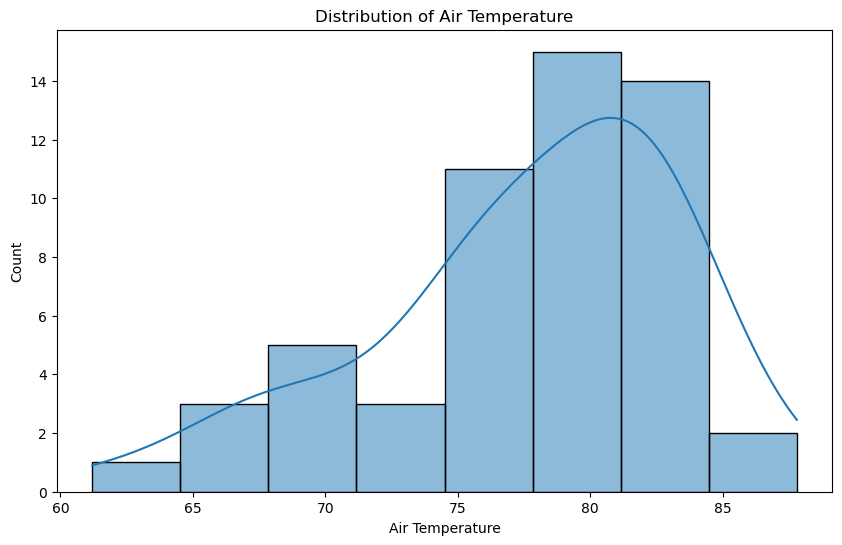

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# 分布检查：Air Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Air Temperature'], kde=True)
plt.title('Distribution of Air Temperature')
plt.show()
